In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime 

plt.style.use('fivethirtyeight')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
log_df = pd.read_csv('Dataset/Log/log.csv')
main_pf_df = pd.read_csv("Dataset/main_pf.csv")

# BenchMarks

In [3]:
tickers = {
    'BTC-USD' : ['Bitcoin', "#f57842"],
    'GC=F' : ['Gold', "#d1960a"],
    '^NSEI' : ['Nifty_50', "#0a9fd1"],
    '^GSPC' : ['SP500', "#d10a35"],
    # 'NVDA': ['NVIDIA', "#333"],
    'USDINR=X' : ['USDINR', "#d0d0d0"],
      '^IXIC': ['NASDAQ', "#950ad1"],
        'BRK-B': ['BRK', "#0ad18f"],  
}

# Cal CAGRS

In [4]:
def cal_cagrs(normalized, main_pf_df):
    cagrs_map = {}
    new_normalized = normalized.copy()
    new_normalized = new_normalized.pct_change().dropna()

    new_main_pf_df = main_pf_df['Pf_Value']
    new_main_pf_df = new_main_pf_df.pct_change().dropna()

    freq = 365 
    years = len(new_normalized) / freq 

    for ticker, _ in tickers.items():  
        
        cagrs = (new_normalized[ticker].add(1).prod() ** (1/years) -1) * 100 

        # print(f"{pf_name} Returns : {cagrs.round(2)} %")
        cagrs_map[ticker] = float(cagrs.round(2))

    cagrs = (new_main_pf_df.add(1).prod() ** (1/years) -1) * 100
    # print(f"My PF Returns : {float(cagrs.round(2))} %")

    cagrs_map['My_pf'] = float(cagrs.round(2))

    return cagrs_map

# Plot Returns

In [5]:

def plot_returns(): 
    # print(tickers)

    start = '2021-01-01'
    end = datetime.now().strftime('%Y-%m-%d')


    # Download data
    data = yf.download(list(tickers.keys()), start=start, end=end, auto_adjust = True, progress = False)['Close']
    # data.columns = list(tickers.keys())  
    # print(data.columns)

    data_filled = data.ffill()
    data_filled = data.bfill()

    # Normalize to 100 starting value for return comparison
    normalized = (data_filled / data_filled.iloc[0]) * 100


    cagr_map = cal_cagrs(normalized, main_pf_df)
    # print(cagr_map)

    # Plot
    plt.figure(figsize=(18, 9))
    for col in normalized.columns:
        # print(col)
        plt.plot(normalized.index, normalized[col], label=f"{tickers[col][0]} | CAGR : {cagr_map[col]} %", linewidth=2, color = tickers[col][1])


    plt.plot(normalized.index, main_pf_df['Pf_Value_Pct_100'], label = f"PF | CAGR : {cagr_map['My_pf']} %", linewidth = 3, linestyle = '--', color = "#555")

    plt.title('Normalized Returns: 2021-01-01 to Today (Base=100)', fontsize=30)
    plt.xlabel('Date')
    plt.ylabel('Normalized Value')
    # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


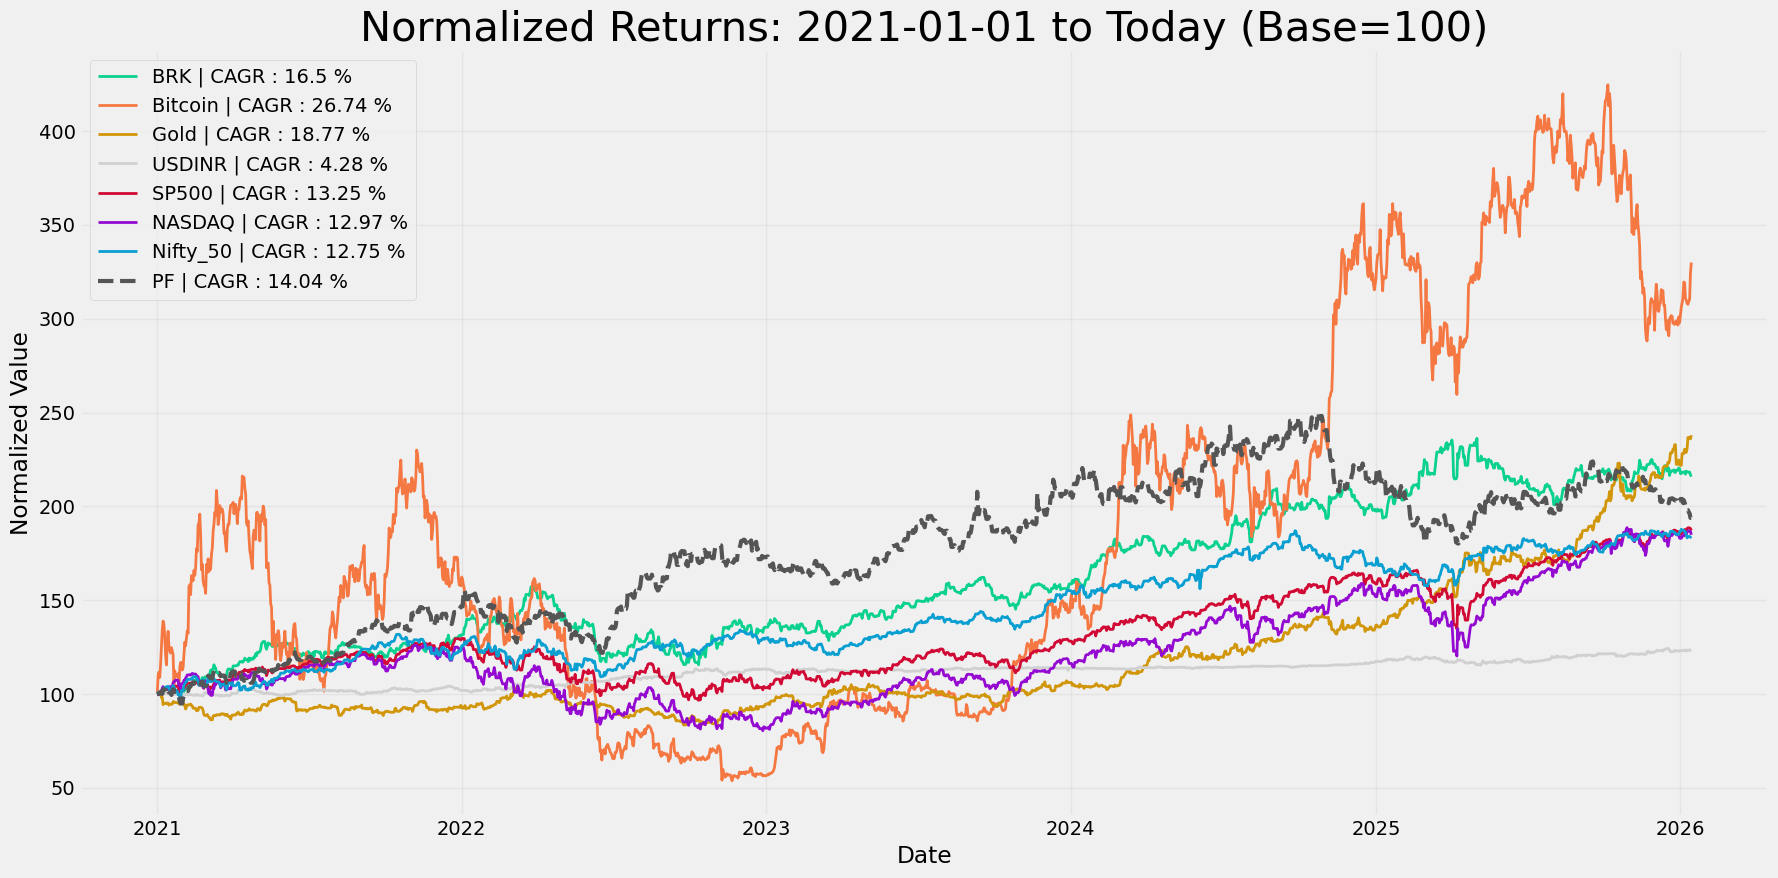

In [6]:
plot_returns()